In [2]:
!pip install sklearn_som
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier 
from sklearn_som.som import SOM
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
rs = 0
df = pd.read_csv('https://raw.githubusercontent.com/sameh999/Machine_learning_project/main/MCSDatasetNEXTCONLab.csv')
df['Ligitimacy'] = df['Ligitimacy'].replace(0,-1)
trDf = df[:10139][:]
teDf = df[10139:][:]
trDf = trDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
trDf = trDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
teDf = teDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
teDf = teDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
trY = trDf['Ligitimacy'].values
teY = teDf['Ligitimacy'].values
trX = trDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values
teX = teDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values

# Part 1

## Question 1


In [4]:

def evaluate_model(model, x_test, y_test,title):
    # Predict Test Data 
    y_pred = model.predict(x_test)
    # Display confussion matrix plot
    acc = metrics.accuracy_score(y_test, y_pred)
    print(str(title)+" Accuracy: "+str( acc))
    plot_confusion_matrix(model, x_test, y_test)
    plt.title(title) 
    plt.grid('off') 
    plt.show()
    return acc

In [5]:
def trainSVM(x,y):
  #Create a svm Classifier
  clf_svm = svm.SVC() # Linear Kernel
  #Train the model using the training sets
  return clf_svm.fit(x,y)


In [6]:
def trainDT(x,y):
  #Create a svm Classifier
  clf_dtc = tree.DecisionTreeClassifier(random_state=0)
  #Train the model using the training sets
  return clf_dtc.fit(x, y)

In [7]:
def trainKNN(trX,trY):
  # Building KNN model 
  clf_knn = KNeighborsClassifier(n_neighbors= 2 )
  #Train the model using the training sets
  return clf_knn.fit(trX, trY)

### SVM

SVM Baseline Accuracy: 0.8626006904487917


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


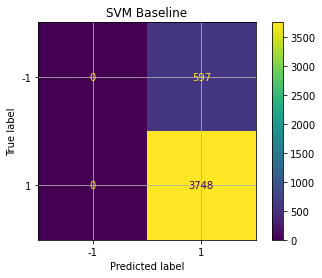

In [8]:
#train svm model
clf_svm =  trainSVM(trX,trY)
# Evaluate  svm model
svm_acc = evaluate_model(clf_svm, teX , teY,"SVM Baseline")

### Decision Tree


DT Baseline Accuracy: 0.9436133486766398


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


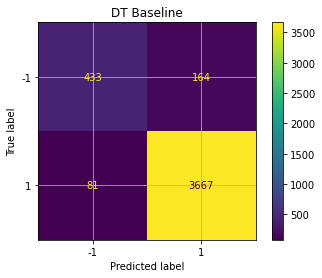

In [9]:
#Train the model using the training sets
clf_dtc = trainDT(trX,trY)
# Evaluate Model
dtc_acc = evaluate_model(clf_dtc, teX , teY,"DT Baseline")

### KNN

KNN Baseline Accuracy: 0.9790563866513233


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


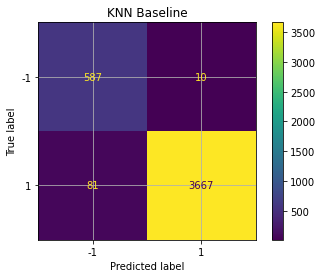

In [10]:
#Train the model using the training sets
clf_knn = trainKNN(trX, trY)
# Evaluate Model
knn_acc = evaluate_model(clf_knn, teX , teY,"KNN Baseline")

,Model,Base
0,SVM,0.862601
1,DT,0.943613
2,KNN,0.979056


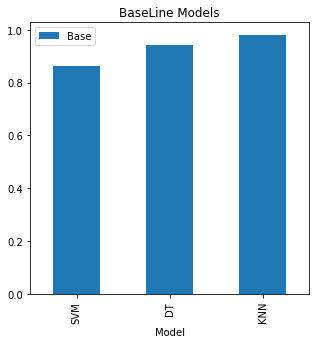

In [11]:
# create data
acc_Base_Scores = [svm_acc,dtc_acc,knn_acc]

df = pd.DataFrame([['SVM', acc_Base_Scores[0]], ['DT',acc_Base_Scores[1]], ['KNN',acc_Base_Scores[2]]],
                  columns=['Model', 'Base'])


# plot grouped bar chart
df.plot(x='Model',
        kind='bar',
        stacked=True,
        title='BaseLine Models',figsize=(5,5))
# view data
df.head()



## Question 2


### SMOTE

Resampled dataset shape Counter({1: 8839, -1: 1300})
Resampled dataset shape Counter({1: 8839, -1: 8839})
SVM  SMOTE Resample Accuracy: 0.44533947065592633


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


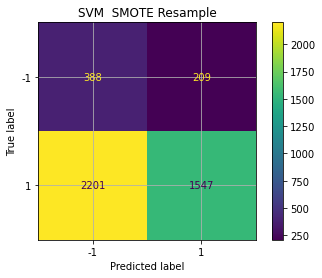

DT SMOTE Resample Accuracy: 0.9316455696202531


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


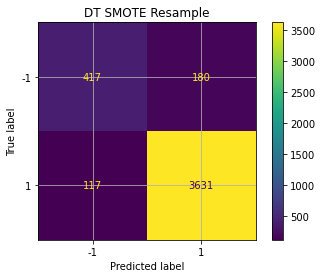

KNN SMOTE Resample Accuracy: 0.9790563866513233


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


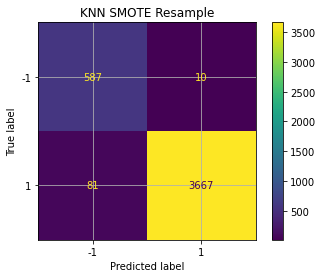

[0.44533947065592633, 0.9316455696202531, 0.9790563866513233]


In [12]:
sm = SMOTE(random_state=42)
print('Resampled dataset shape %s' % Counter(trY))
x_sm, y_sm = sm.fit_resample(trX, trY)
print('Resampled dataset shape %s' % Counter(y_sm))

#Train the SVM using the training resample SMOTE sets
clf_svm =  trainSVM(x_sm, y_sm)
svm_acc = evaluate_model(clf_svm, teX , teY,"SVM  SMOTE Resample")

#Train the DT using the training resample SMOTE sets
clf_dtc = trainDT(x_sm, y_sm)
dtc_acc = evaluate_model(clf_dtc, teX , teY,"DT SMOTE Resample")

#Train the KNN using the training resample SMOTE sets
clf_knn = trainKNN(x_sm, y_sm)
knn_acc = evaluate_model(clf_knn, teX , teY,"KNN SMOTE Resample")

acc_Smote_Scores = [svm_acc,dtc_acc,knn_acc]
print(acc_Smote_Scores)

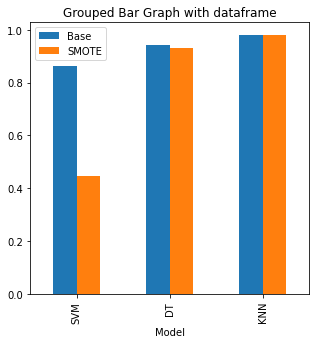

In [13]:
# create data 
df = pd.DataFrame([['SVM',acc_Base_Scores[0],acc_Smote_Scores[0] ],
                   ['DT',acc_Base_Scores[1],acc_Smote_Scores[1]],
                   ['KNN',acc_Base_Scores[2],acc_Smote_Scores[2]]],
                  columns=['Model', 'Base', 'SMOTE'])
# view data

  
# plot grouped bar chart
df.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe',figsize=(5,5))

### ADASYN

SVM  ADASYN Resample Accuracy: 0.5422324510932106


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


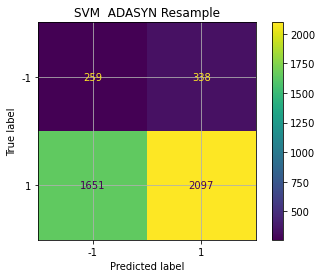

DT ADASYN Resample Accuracy: 0.915765247410817


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


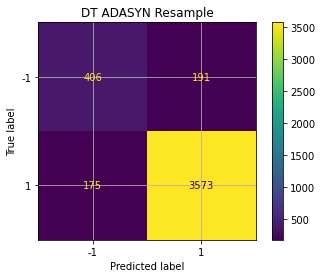

KNN ADASYN Resample Accuracy: 0.9788262370540851


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


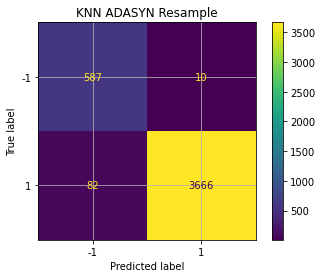

In [14]:
# Apply the random over-sampling
ada = ADASYN()
X_res_ada, y_res_ada = ada.fit_resample(trX,trY)

#Train the SVM using the training resample SMOTE sets
clf_svm =  trainSVM(X_res_ada, y_res_ada)
svm_acc_ada = evaluate_model(clf_svm, teX , teY,"SVM  ADASYN Resample")

#Train the DT using the training resample SMOTE sets
clf_dtc = trainDT(X_res_ada, y_res_ada)
dtc_acc_ada = evaluate_model(clf_dtc, teX , teY,"DT ADASYN Resample")

#Train the KNN using the training resample SMOTE sets
clf_knn = trainKNN(X_res_ada, y_res_ada)
knn_acc_ada = evaluate_model(clf_knn, teX , teY,"KNN ADASYN Resample")

acc_ada_Scores = [svm_acc_ada,dtc_acc_ada,knn_acc_ada]



  Model      Base     SMOTE    ADASYN
0   SVM  0.862601  0.445339  0.542232
1    DT  0.943613  0.931646  0.915765
2   KNN  0.979056  0.979056  0.978826


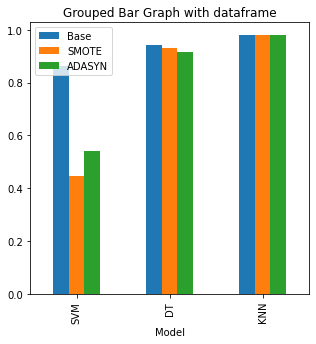

In [15]:
# create data
df = pd.DataFrame([['SVM',acc_Base_Scores[0],acc_Smote_Scores[0],acc_ada_Scores[0] ],
                   ['DT',acc_Base_Scores[1],acc_Smote_Scores[1],acc_ada_Scores[1]],
                   ['KNN',acc_Base_Scores[2],acc_Smote_Scores[2],acc_ada_Scores[2]]],
                  columns=['Model', 'Base', 'SMOTE','ADASYN'])
# view data
print(df.head())
  
# plot grouped bar chart
df.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe',figsize=(5,5))

### Random Undersampling

SVM  Random Undersampling  Accuracy: 0.44533947065592633


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


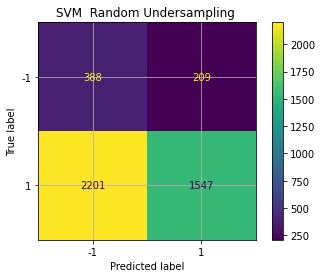

DT Random Undersampling Accuracy: 0.9125431530494822


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


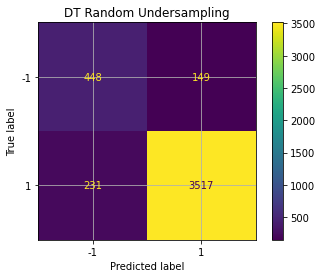

KNN  Random Undersampling Accuracy: 0.9613348676639816


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


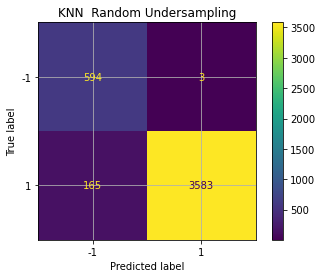

In [16]:
# using random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(trX,trY)
#Train the SVM using the training resample SMOTE sets
clf_svm =  trainSVM(X_rus, y_rus)
svm_acc_rus= evaluate_model(clf_svm, teX , teY,"SVM  Random Undersampling ")

#Train the DT using the training resample SMOTE sets
clf_dtc = trainDT(X_rus, y_rus)
dtc_acc_rus = evaluate_model(clf_dtc, teX , teY,"DT Random Undersampling")

#Train the KNN using the training resample SMOTE sets
clf_knn = trainKNN(X_rus, y_rus)
knn_acc_rus = evaluate_model(clf_knn, teX , teY,"KNN  Random Undersampling")

acc_rus_Scores = [svm_acc_rus,dtc_acc_rus,knn_acc_rus]

<bound method NDFrame.head of   Model  Base Score  SMOTE Score  ADASYN Score  Random Under Sampling
0   SVM    0.862601     0.445339      0.542232               0.445339
1    DT    0.943613     0.931646      0.915765               0.912543
2   KNN    0.979056     0.979056      0.978826               0.961335>


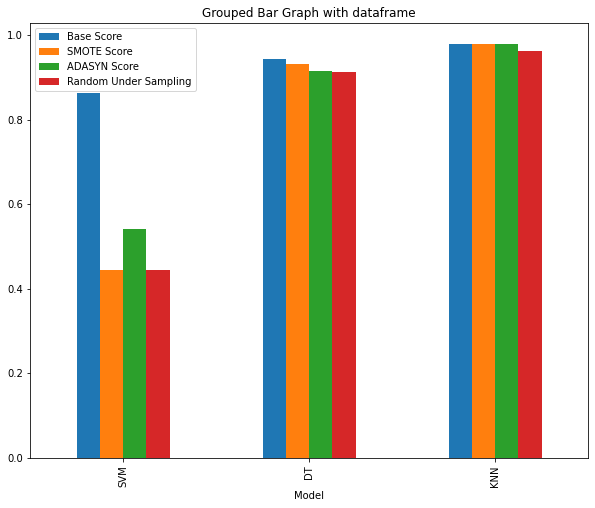

In [17]:

# create data
df = pd.DataFrame([['SVM',acc_Base_Scores[0],acc_Smote_Scores[0],acc_ada_Scores[0],acc_rus_Scores[0] ],
                   ['DT',acc_Base_Scores[1],acc_Smote_Scores[1],acc_ada_Scores[1],acc_rus_Scores[1]],
                   ['KNN',acc_Base_Scores[2],acc_Smote_Scores[2],acc_ada_Scores[2],acc_rus_Scores[2]]],
                  columns=['Model', 'Base Score', 'SMOTE Score','ADASYN Score','Random Under Sampling'])
# view data
print(df.head)
  
# plot grouped bar chart
df.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe',figsize=(10,8))

## Question 3

### PCA

#### SVM

Accuracy of SVM before FS (%): 0.86%
Maximum accuracy:0.525%
Best number of features: 3


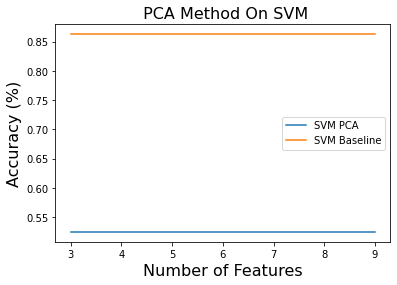

In [18]:
 
# get the accuracy of the the SVM base model  
acc = acc_Base_Scores[0]
print("Accuracy of SVM before FS (%): {:.2f}%".format( acc))
#make dictionary to store the accuracy of model after change n-component 
acc_dict_beforeDR = {}
acc_dict_afterDR = {}

#Create a svm Classifier
clf_svm = svm.SVC() 
for nf in range(3,10):
  pca = PCA(n_components=nf)
  
  X_pca_tr = pca.fit(X_res_ada).transform(X_res_ada)
  X_pca_test = pca.transform(teX)
  clf_svm.fit(X_pca_tr,y_res_ada)
  yPred_pca = clf_svm.predict(X_pca_test)
  acc_pca = accuracy_score(teY, yPred_pca)
  acc_dict_afterDR[nf] = acc_pca

  acc_dict_beforeDR[nf]= acc

plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label='SVM PCA')
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label='SVM Baseline')

Title = " PCA Method On SVM"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
svm_max_accuracy = max(acc_dict_afterDR.values())
print("Maximum accuracy:{:.3f}%".format(svm_max_accuracy))
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

#### Decision Tree


Accuracy of DT before FS (%): 0.94%
Maximum accuracy:0.981%
Best number of features: 3


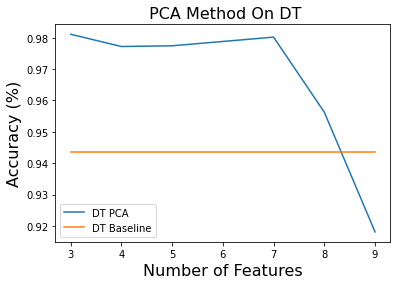

In [19]:
# get the accuracy of the the SVM base model  
acc = acc_Base_Scores[1]
print("Accuracy of DT before FS (%): {:.2f}%".format( acc))
#make dictionary to store the accuracy of model after change n-component 
acc_dict_beforeDR = {}
acc_dict_afterDR = {}

#Create a DT Classifier
clf_dtc = tree.DecisionTreeClassifier(random_state=0)
for nf in range(3,10):
  pca = PCA(n_components=nf)
  X_pca_tr = pca.fit(X_res_ada).transform(X_res_ada)
  X_pca_test = pca.transform(teX)
  clf_dtc.fit(X_pca_tr,y_res_ada)
  yPred_pca = clf_dtc.predict(X_pca_test)
  acc_pca = accuracy_score(teY, yPred_pca)
  acc_dict_afterDR[nf] = acc_pca

  acc_dict_beforeDR[nf]= acc

plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label='DT PCA')
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label='DT Baseline')

Title = " PCA Method On DT"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
dt_max_accuracy = max(acc_dict_afterDR.values())
print("Maximum accuracy:{:.3f}%".format(dt_max_accuracy))
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

 #### KNN 

Accuracy of DT before FS (%): 0.979%
Maximum accuracy:0.980%
Best number of features: 4


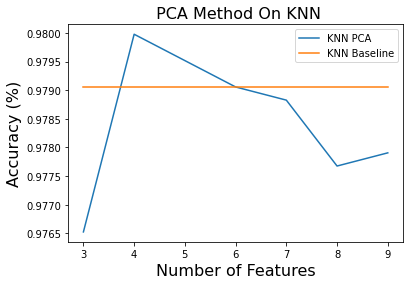

In [20]:
 
# get the accuracy of the the SVM base model  
acc = acc_Base_Scores[2]
print("Accuracy of DT before FS (%): {:.3f}%".format( acc))
#make dictionary to store the accuracy of model after change n-component 
acc_dict_beforeDR = {}
acc_dict_afterDR = {}

#Create a KNN Classifier
#X_res_ada
#y_res_ada 

clf_knn = KNeighborsClassifier()
for nf in range(3,10):
  pca = PCA(n_components=nf)
  X_pca_tr = pca.fit(X_res_ada).transform(X_res_ada)
  X_pca_test = pca.transform(teX)
  clf_knn.fit(X_pca_tr,y_res_ada)
  yPred_pca = clf_knn.predict(X_pca_test)
  acc_pca = accuracy_score(teY, yPred_pca)
  acc_dict_afterDR[nf] = acc_pca

  acc_dict_beforeDR[nf]= acc

plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label='KNN PCA')
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label='KNN Baseline')

Title = " PCA Method On KNN"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
knn_max_accuracy = max(acc_dict_afterDR.values())
print("Maximum accuracy:{:.3f}%".format(knn_max_accuracy))
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

,Model,Base Score,SMOTE Score,ADASYN Score,Random Under Sampling,PCA Best N
0,SVM,0.862601,0.445339,0.542232,0.445339,0.524511
1,DT,0.943613,0.931646,0.915765,0.912543,0.981128
2,KNN,0.979056,0.979056,0.978826,0.961335,0.979977


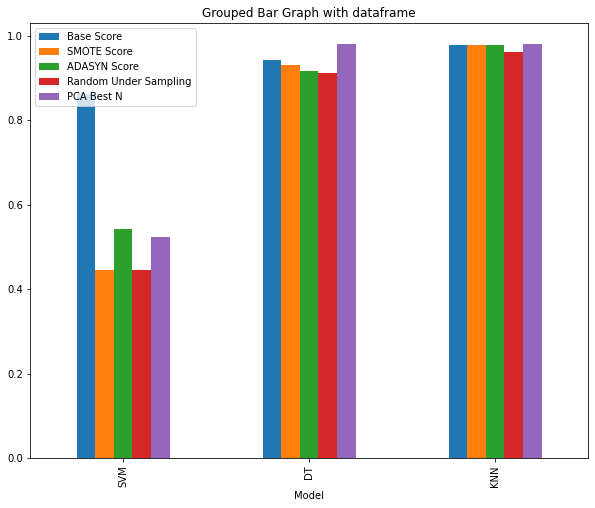

In [21]:
# create data
df = pd.DataFrame([['SVM',acc_Base_Scores[0],acc_Smote_Scores[0],acc_ada_Scores[0],acc_rus_Scores[0],svm_max_accuracy ],
                   ['DT',acc_Base_Scores[1],acc_Smote_Scores[1],acc_ada_Scores[1],acc_rus_Scores[1],dt_max_accuracy],
                   ['KNN',acc_Base_Scores[2],acc_Smote_Scores[2],acc_ada_Scores[2],acc_rus_Scores[2],knn_max_accuracy]],
                  columns=['Model', 'Base Score', 'SMOTE Score','ADASYN Score','Random Under Sampling','PCA Best N'])
  
# plot grouped bar chart
df.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe',figsize=(10,8))
df.head()


### T-SNE

In [22]:
# Utility function to visualize the outputs of PCA and t-SNE
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels to list
    txts = []

    for i in range(num_classes):
        # Position of each label at median of data points.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

#### Before & After Applying PCA

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tr2d = TSNE(n_components=2, n_jobs=-1).fit_transform(X_res_ada)
tr2d_pca = TSNE(n_components=2, n_jobs=-1).fit_transform(X_pca_tr)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


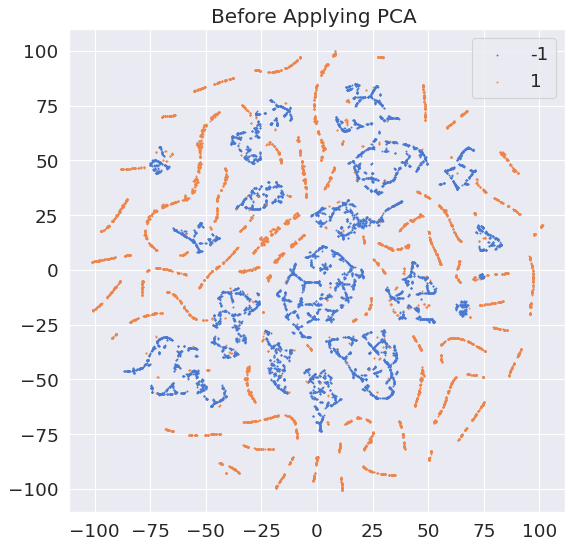

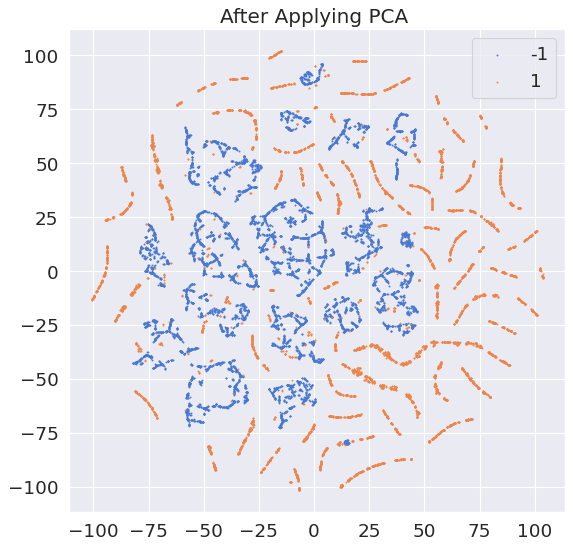

In [24]:
plt.figure(figsize=(8, 8), dpi=80)
for label in np.unique(y_res_ada):
  plt.scatter(tr2d[y_res_ada == label, 0], tr2d[y_res_ada == label, 1], s=0.5, label=label)
plt.title("Before Applying PCA ")
plt.legend()
plt.show()

plt.figure(figsize=(8, 8), dpi=80)
for label in np.unique(y_res_ada):

  plt.scatter(tr2d_pca[y_res_ada == label, 0], tr2d_pca[y_res_ada == label, 1], s=0.5, label=label )
plt.title("After Applying PCA ")
plt.legend()
plt.show()

## Question 4

###  Stacking BaseLine 

Model performance for Test set
- Accuracy: 0.9850402761795167
Stacking Classifier Confusion Matrix Accuracy: 0.9850402761795167


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


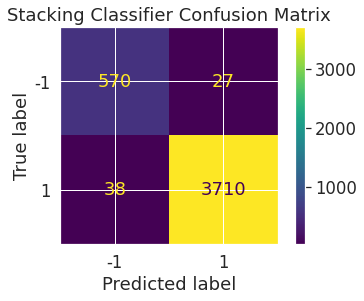

In [25]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('svm_rbf',svm.SVC()),
    ('dt', tree.DecisionTreeClassifier(random_state=1)),
    ('knn',KNeighborsClassifier())
     ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(trX, trY)

# Make predictions
y_test_pred = stack_model.predict(teX)

# Test set model performance
stack_base_score = accuracy_score(teY, y_test_pred) # Calculate Accuracy

print('Model performance for Test set')
print('- Accuracy: %s' % stack_base_score)

stack_base_score = evaluate_model(stack_model, teX , teY,"Stacking Classifier Confusion Matrix")

###  Stacking Models after applying SMOTE 

Model performance for Test set
- Accuracy: 0.9838895281933256
Stacking Classifier Confusion Matrix Accuracy: 0.9838895281933256


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


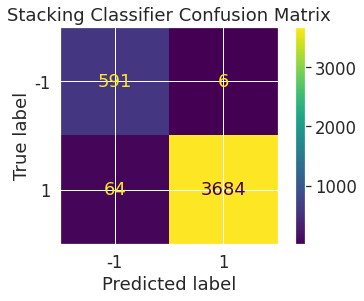

In [26]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('svm_rbf',svm.SVC()),
    ('dt', tree.DecisionTreeClassifier(random_state=1)),
    ('knn',KNeighborsClassifier())
     ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(x_sm, y_sm)

# Make predictions
y_test_pred = stack_model.predict(teX)

# Test set model performance
stack_smote_score = accuracy_score(teY, y_test_pred) # Calculate Accuracy

print('Model performance for Test set')
print('- Accuracy: %s' % stack_smote_score)

stack_smote_score = evaluate_model(stack_model, teX , teY,"Stacking Classifier Confusion Matrix")

### Stacking Models after applying ADASYN 

Model performance for Test set
- Accuracy: 0.9811277330264672
Stacking Classifier Confusion Matrix Accuracy: 0.9811277330264672


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


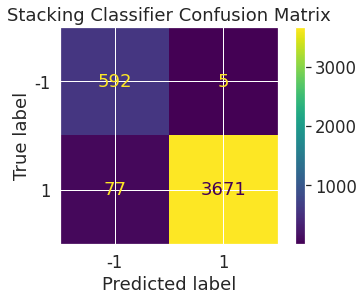

In [27]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('svm_rbf',svm.SVC()),
    ('dt', tree.DecisionTreeClassifier(random_state=1)),
    ('knn',KNeighborsClassifier())
     ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
# Train stacked model
stack_model.fit(X_res_ada, y_res_ada)

# Make predictions
y_test_pred = stack_model.predict(teX)

# Test set model performance
stack_ada_score = accuracy_score(teY, y_test_pred) # Calculate Accuracy

print('Model performance for Test set')
print('- Accuracy: %s' % stack_ada_score)

stack_ada_score = evaluate_model(stack_model, teX , teY,"Stacking Classifier Confusion Matrix")

### Stacking Models After Random UnderSampling

Model performance for Test set
- Accuracy: 0.9661680092059839
Stacking Classifier Confusion Matrix Accuracy: 0.9661680092059839


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


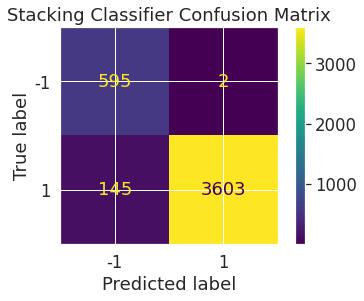

In [28]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('svm_rbf',svm.SVC()),
    ('dt', tree.DecisionTreeClassifier(random_state=1)),
    ('knn',KNeighborsClassifier())
     ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
# Train stacked model
stack_model.fit(X_rus, y_rus)

# Make predictions
y_test_pred = stack_model.predict(teX)

# Test set model performance
stack_rus_score = accuracy_score(teY, y_test_pred) # Calculate Accuracy

print('Model performance for Test set')
print('- Accuracy: %s' % stack_rus_score)

stack_rus_score = evaluate_model(stack_model, teX , teY,"Stacking Classifier Confusion Matrix")

Stacking models After Applying the best number of features with PCA

0.8626006904487917
0.9880322209436133
0.9811277330264672
Stacking Classifier Confusion Matrix Accuracy: 0.9866513233601841


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


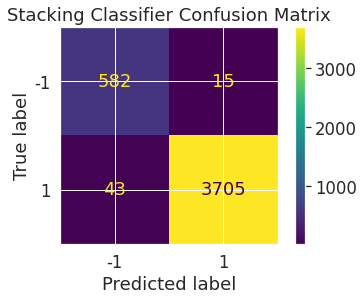

In [29]:
#Accurcy for each algorithm
from sklearn.pipeline import Pipeline
#SVM
pipe_svm= Pipeline([
    ('pca',PCA(n_components=3)),
    ('model', svm.SVC(random_state=0)),
])
pipe_svm.fit(trX, trY)
print(pipe_svm.score(teX, teY))

#decisiontree
pipe_dt= Pipeline([
    ('pca',PCA(n_components=3)),
    ('model', tree.DecisionTreeClassifier(random_state=0)),
])
pipe_dt.fit(trX, trY)
print(pipe_dt.score(teX, teY))

pipe_knn= Pipeline([
    ('pca',PCA(n_components=7)),
    ('model', KNeighborsClassifier()),
])
#knn
pipe_knn.fit(trX, trY)
print(pipe_knn.score(teX, teY))


#Apply stacking strategy and Plot the confusion matrix
pipe_models = [('pipe_svm',pipe_svm),
              ('pipe_dt', pipe_dt),
              ('pipe_knn',pipe_knn)]
stack_model = StackingClassifier(pipe_models, LogisticRegression(random_state=rs), n_jobs=-1)
stack_model.fit(trX, trY)
pred_Y = stack_model.predict(teX)
pipe_acore = accuracy_score(teY, pred_Y)*100

acc_stacking = evaluate_model(stack_model, teX , teY,"Stacking Classifier Confusion Matrix")




### Conclusion Of Stacking

,Model,Base Score,SMOTE Score,ADASYN Score,RUS,PCA Best N
0,SVM,0.862601,0.445339,0.542232,0.445339,0.524511
1,DT,0.943613,0.931646,0.915765,0.912543,0.981128
2,KNN,0.979056,0.979056,0.978826,0.961335,0.979977
3,Stacking,0.985040,0.983890,0.981128,0.966168,0.986651


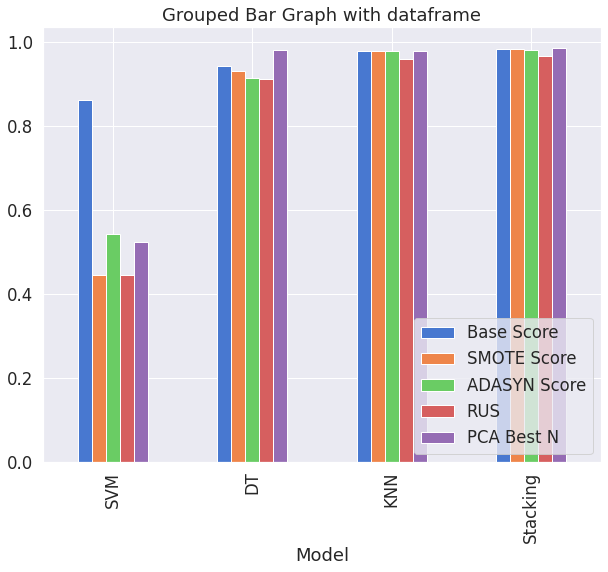

In [30]:
# create data
df = pd.DataFrame([['SVM',acc_Base_Scores[0],acc_Smote_Scores[0],acc_ada_Scores[0],acc_rus_Scores[0],svm_max_accuracy ],
                   ['DT',acc_Base_Scores[1],acc_Smote_Scores[1],acc_ada_Scores[1],acc_rus_Scores[1],dt_max_accuracy],
                   ['KNN',acc_Base_Scores[2],acc_Smote_Scores[2],acc_ada_Scores[2],acc_rus_Scores[2],knn_max_accuracy],
                   ['Stacking',stack_base_score,stack_smote_score,stack_ada_score,stack_rus_score,acc_stacking]],
                  columns=['Model', 'Base Score', 'SMOTE Score','ADASYN Score','RUS','PCA Best N'])
  
# plot grouped bar chart
df.plot(x='Model',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe',figsize=(10,8))
plt.legend(loc='lower right')
df.head()

# Part 2

## scaling the testing and training data 

In [ ]:
# demonstrate data normalization with sklearn

# reshape 1d arrays to 2d arrays
trainy = trY.reshape(len(trY), 1)
testy = teY.reshape(len(teY), 1)
# create 
scaler = MinMaxScaler()
# fit and transform in one step
trainX = scaler.fit_transform(trX)
testX = scaler.fit_transform(teX)
trainy = scaler.fit_transform(trainy)
testy = scaler.fit_transform(testy)

## Q 1 building multilayer perceptron classifer

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


MLP Accuracy: 0.8676639815880323


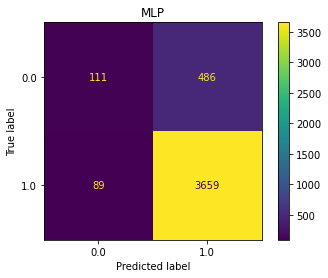

0.8676639815880323

In [ ]:
#applying  MLP classifier and get accuracy 
mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(15,15), random_state=1)
mlp.fit(trainX, trainy)
evaluate_model(mlp, testX, testy,"MLP")



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Maximum accuracy:0.863%
Best number of iteration : 1


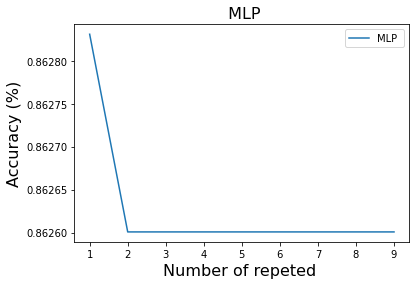

In [ ]:
 # get the accuracy of the the MLP base model  
#make dictionary to store the accuracy of model after iteration  
acc_Base_Scores = {}

#Create a MLP Classifier
mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(15,15), random_state=1, max_iter=1, warm_start=True)
for nf in range(1,10):
  mlp.fit(trainX, trainy)
  y_pred = mlp.predict(testX)
  acc = accuracy_score(testy, y_pred)
  acc_Base_Scores[nf] = acc

plt.plot(*zip(*sorted(acc_Base_Scores.items())),label='MLP ')
Title = " MLP"
plt.title(Title, fontsize=16)
plt.xlabel("Number of repeted ", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
MLP_max_accuracy = max(acc_Base_Scores.values())
print("Maximum accuracy:{:.3f}%".format(MLP_max_accuracy))
print("Best number of iteration :", max(acc_Base_Scores, key=acc_Base_Scores.get))

In [ ]:
print(acc_Base_Scores)



{1: 0.86283084004603, 2: 0.8626006904487917, 3: 0.8626006904487917, 4: 0.8626006904487917, 5: 0.8626006904487917, 6: 0.8626006904487917, 7: 0.8626006904487917, 8: 0.8626006904487917, 9: 0.8626006904487917}


## Q2 apply wrapper method and find the best number of feature with MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

Maximum accuracy:0.871%
Best number of features: 9


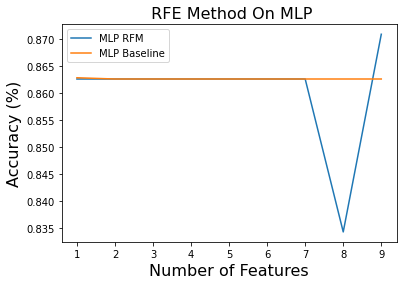

In [ ]:
# Sequential Feature Selector
# get the accuracy of the the MLP base model  
acc = acc_Base_Scores[1]
print("Accuracy of MLP before FS (%): {:.2f}%".format( acc))
#make dictionary to store the accuracy of model after change n-component 
acc_dict_beforeDR = {}
acc_dict_afterDR = {}

#Create a mlp Classifier
clf_mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(15,15), random_state=1)
for nf in range(1,10):
  # define the method
  Sfs = SequentialFeatureSelector(estimator=clf_mlp , n_features_to_select=nf)
  # fit the model
  Sfs.fit(trainX,trainy)
  # transform the data
  trainX_sfs = Sfs.transform(trainX)
  testX_sfs = Sfs.fit(testX,testy).transform(testX)

  clf_mlp.fit(trainX_sfs,trainy)
  yPred_mlp = clf_mlp.predict(testX_sfs)
  acc_mlp = accuracy_score(testy, yPred_mlp)
  acc_dict_afterDR[nf] = acc_mlp
  acc_dict_beforeDR[nf]= acc_Base_Scores[nf]

plt.plot(*zip(*sorted(acc_dict_afterDR.items())),label='MLP RFM')
plt.plot(*zip(*sorted(acc_dict_beforeDR.items())),label='MLP Baseline')
Title = " RFE Method On MLP"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
MLP_max_accuracy = max(acc_dict_afterDR.values())
print("Maximum accuracy:{:.3f}%".format(MLP_max_accuracy))
print("Best number of features:", max(acc_dict_afterDR, key=acc_dict_afterDR.get))

### find the best dataset with 9 feature selection 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

the maximum accuracy after feature selection  Accuracy: 0.8708860759493671


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


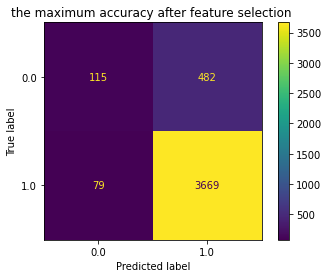

Maximum accuracy:0.871%


In [ ]:
# find the best dataset with 9 features and get the cofusion matrix 
#Create a mlp Classifier
clf_mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(15,15), random_state=1)
# define the method
Sfs = SequentialFeatureSelector(estimator=clf_mlp , n_features_to_select=9)
# fit and transform the data
trainX_sfs = Sfs.fit(trainX,trainy).transform(trainX)
testX_sfs = Sfs.fit(testX,testy).transform(testX)
# fit the MLP model 
clf_mlp.fit(trainX_sfs,trainy)
# get the accuracy and confusion matrix 
fs_accuracy = evaluate_model(clf_mlp, testX_sfs, testy,"the maximum accuracy after feature selection ")
print("Maximum accuracy:{:.3f}%".format(fs_accuracy))

## Q3 SOM and MLP

In [ ]:
fs_trainX =trainX_sfs
fs_testX = testX_sfs

mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(15,15), random_state=1)
all_acuracy =[]
avrage_acc = {}
_,dim =fs_trainX.shape
for nClusters in range(2,9):
  # apply the Som on the new n cluster
  train_som = SOM(m= nClusters, n=nClusters, dim=dim)
  #fit the prediction 
  train_som.fit(fs_trainX)
  pred_tr=train_som.fit_predict(fs_trainX)
  pred_te =train_som.fit_predict(fs_testX)
  
  #add new feature 
  som_train =np.hstack((fs_trainX, np.atleast_2d(pred_tr).T))
  som_test =np.hstack((fs_testX, np.atleast_2d(pred_te).T))
  for nf in range(1,10):
    mlp.fit(som_train, trainy)
    pred_mlp = mlp.predict(som_test)
    acc = accuracy_score(testy, pred_mlp)
    all_acuracy.append(acc) 
  #add values to sil to plot it leater 
  avrage_acc[nClusters] = np.average(all_acuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

### plot average accuracy come from MLP after add cluster form som as new feature

{2: 0.8660529344073647, 3: 0.8643268124280783, 4: 0.8628308400460298, 5: 0.8623705408515535, 6: 0.8615420023014959, 7: 0.8617951668584579, 8: 0.8617129705737301}
Maximum accuracy:0.866%
Best number of cluster feature  : 2


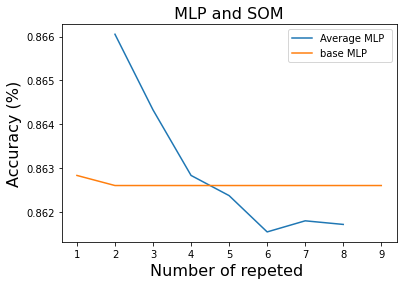

In [ ]:
print(avrage_acc)
acc_base =acc_dict_beforeDR
plt.plot(*zip(*sorted(avrage_acc.items())),label='Average MLP ')
plt.plot(*zip(*sorted(acc_base.items())),label='base MLP ')

Title = " MLP and SOM "
plt.title(Title, fontsize=16)
plt.xlabel("Number of repeted ", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
MLP_max_accuracy = max(avrage_acc.values())
print("Maximum accuracy:{:.3f}%".format(MLP_max_accuracy))
print("Best number of cluster feature  :", max(avrage_acc, key=avrage_acc.get))

## the best accuracy from SOm and MLP

In [ ]:
# the best number of of cluster is 2 cluster 
all_acuracy = []
_,dim =fs_trainX.shape
train_som = SOM(m =2, n=2, dim=dim)
#fit the prediction 
train_som.fit(fs_trainX)
pred_tr=train_som.fit_predict(fs_trainX)
pred_te =train_som.fit_predict(fs_testX)
#add new feature 
som_train =np.hstack((fs_trainX, np.atleast_2d(pred_tr).T))
som_test =np.hstack((fs_testX, np.atleast_2d(pred_te).T))
for nf in range(1,10):
    mlp.fit(som_train, trainy)
    pred_mlp = mlp.predict(som_test)
    acc = accuracy_score(testy, pred_mlp)
    all_acuracy.append(acc) 

best_acc = np.average(all_acuracy)
print(best_acc)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

0.8692750287686997


## Q4 tuning  number of neruon  and hiden layer number 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

Maximum accuracy:0.901%
Best number of hidden layer : 7


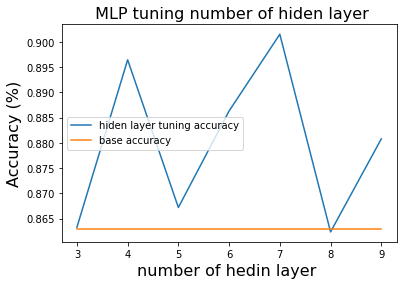

In [ ]:
#make dictionary to store the accuracy of model after iteration  
# the best data we use 
#fs_trainX =trainX_sfs
#fs_testX = testX_sfs
x_train =trainX_sfs
x_test = testX_sfs
old_acc = 0.863  #acc_Base_Scores[1]
acc_before_Scores = {}
acc_new_score ={}
x =[(20,20,20),(20,20,20,20),(20,20,20,20,20),(20,20,20,20,20,20),
    (20,20,20,20,20,20,20),(20,20,20,20,20,20,20,20),(20,20,20,20,20,20,20,20,20),
    (20,20,20,20,20,20,20,20,20,20)]
#Create a MLP Classifier
for nn in range(3,10):
  mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=x[nn-3], random_state=1, learning_rate_init=.1)
  mlp.fit(x_train, trainy)
  y_pred = mlp.predict(x_test)
  acc = accuracy_score(testy, y_pred)
  acc_new_score[nn ] = acc
  acc_before_Scores[nn] = old_acc


plt.plot(*zip(*sorted(acc_new_score.items())),label='hiden layer tuning accuracy')
plt.plot(*zip(*sorted(acc_before_Scores.items())),label='base accuracy ')

Title = " MLP tuning number of hiden layer"
plt.title(Title, fontsize=16)
plt.xlabel("number of hedin layer ", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
MLP_max_accuracy = max(acc_new_score.values())
print("Maximum accuracy:{:.3f}%".format(MLP_max_accuracy))
print("Best number of hidden layer :", max(acc_new_score, key=acc_new_score.get))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

Maximum accuracy:0.912%
Best number of neurons : 16


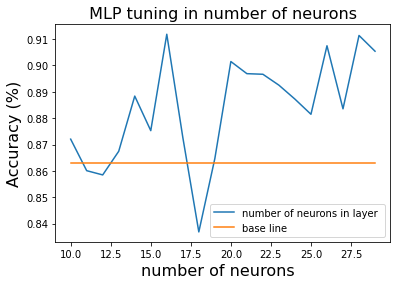

In [ ]:
#make dictionary to store the accuracy of model after iteration  
# the best data we use 
#x_train =som_train
#x_test = som_test
old_acc =0.863   #  acc_Base_Scores[1]
acc_new_score ={}
acc_Base_Scores ={}
#Create a MLP Classifier
for nhidn in range(10,30):
  mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(nhidn,nhidn,nhidn,nhidn,nhidn,nhidn,nhidn), random_state=1, learning_rate_init=.1)
  mlp.fit(x_train, trainy)
  y_pred = mlp.predict(x_test)
  acc = accuracy_score(testy, y_pred)
  acc_new_score[nhidn] = acc
  acc_Base_Scores[nhidn] = old_acc

# plot the base and new accuracy 
plt.plot(*zip(*sorted(acc_new_score.items())),label='number of neurons in layer ')
plt.plot(*zip(*sorted(acc_Base_Scores.items())),label='base line ')
Title = " MLP tuning in number of neurons "
plt.title(Title, fontsize=16)
plt.xlabel("number of neurons  ", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
MLP_max_accuracy = max(acc_new_score.values())
print("Maximum accuracy:{:.3f}%".format(MLP_max_accuracy))
print("Best number of neurons :", max(acc_new_score, key=acc_new_score.get))

### get the confusion matrix for best model 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best model after with 5 layer and 17 neurons tunning Accuracy: 0.9118527042577675


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


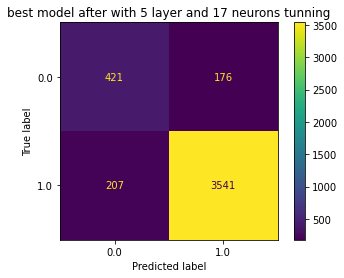

0.9118527042577675

In [ ]:
mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(16,16,16,16,16,16,16), random_state=1, learning_rate_init=.1)
mlp.fit(x_train, trainy)
evaluate_model(mlp ,x_test,testy ,'best model after with 5 layer and 17 neurons tunning')